# Water System Simulation
Tobias Siegfried, 07.10.2024

This project implements an object-oriented water system simulation and optimization tool using Python. It models water systems as networks of nodes and edges in a directed acyclic graph, allowing for the simulation and optimization of water flow over multiple time steps.

More information is available in the README.md file.

## Setup

In [1]:
import sys
import os

# Add the parent directory of 'water_system' to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
# Import necessary classes from the water_system package
from water_system import WaterSystem, SupplyNode, StorageNode, DemandNode, Edge

## Create Sample Water System

In [3]:
# Create instances of nodes
supply_node = SupplyNode("Supply1", default_supply_rate=10)
#supply_node = SupplyNode("Supply1", supply_rates=[10, 12, 8, 15], default_supply_rate=10)
reservoir = StorageNode(id="Reservoir", capacity=12)  # 1000 m³ capacity
agriculture_demand = DemandNode(id="Agriculture", demand_rate=6)  # 6 m³/s
domestic_demand = DemandNode(id="Domestic", demand_rate=3)  # 3 m³/s

# Create edges to connect the nodes
edge1 = Edge(source=supply_node, target=reservoir, capacity=15)
edge2 = Edge(source=reservoir, target=agriculture_demand, capacity=8)
edge3 = Edge(source=reservoir, target=domestic_demand, capacity=5)

# Create a WaterSystem instance and add the nodes and edges
water_system = WaterSystem()

# Add nodes
for node in [supply_node, reservoir, agriculture_demand, domestic_demand]:
    water_system.add_node(node)

# Add edges
for edge in [edge1, edge2, edge3]:
    water_system.add_edge(edge)

## Run Simulation and Plot Results

### Run Simulation

In [4]:
# Run the simulation for a specified number of time steps (e.g., 12 months)
num_time_steps = 24
water_system.simulate(num_time_steps)

### Visualize Results

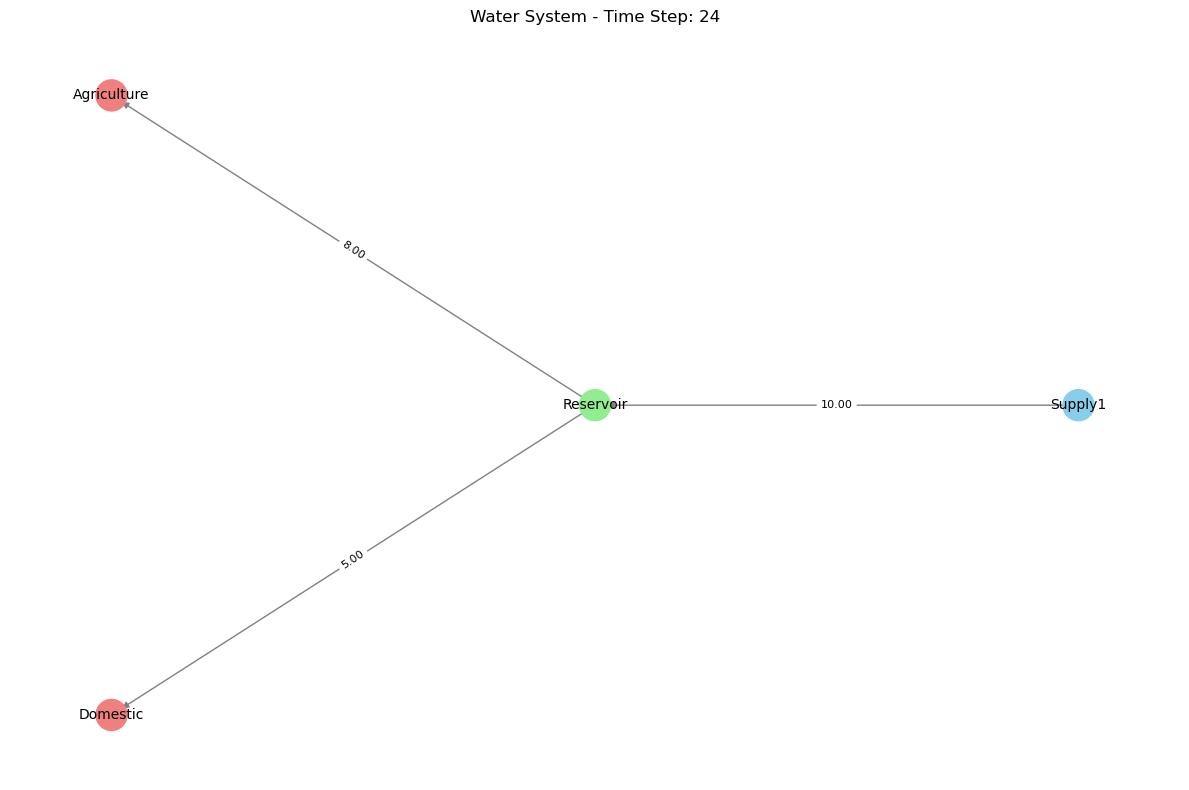

Supply node flow over time:
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Reservoir storage over time:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Agriculture demand satisfaction:
[0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

Domestic demand satisfaction:
[0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


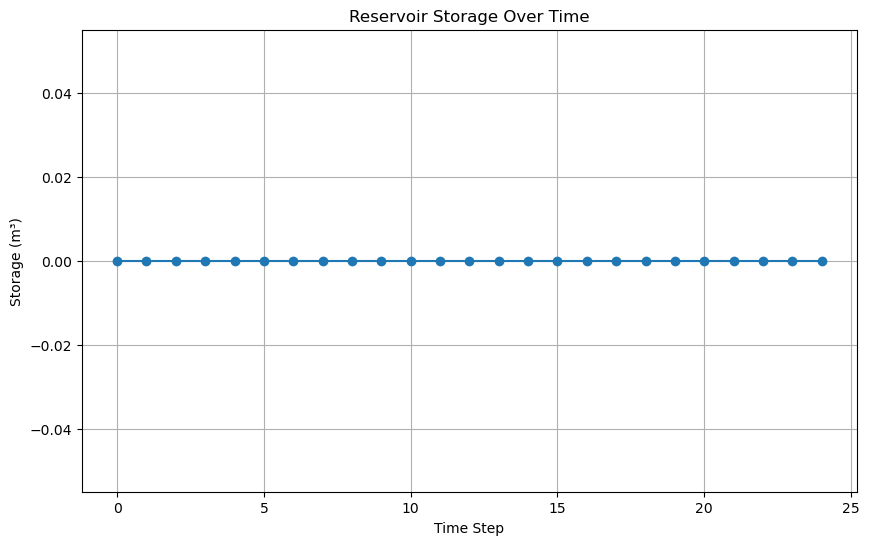

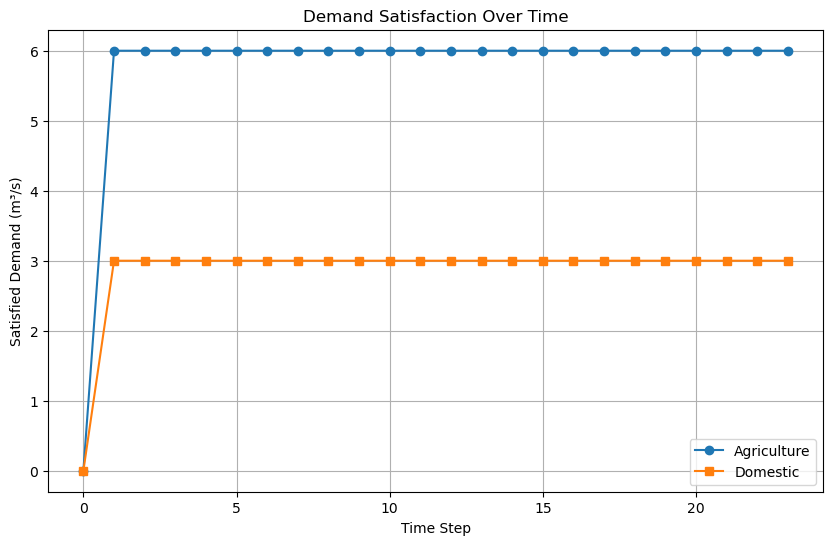

In [5]:
# Visualize the results
water_system.visualize()

# Analyze the water flow
## adding a printout of the supply node
print("Supply node flow over time:")
print(supply_node.supply_history)

print("Reservoir storage over time:")
print(reservoir.storage)

print("\nAgriculture demand satisfaction:")
print([min(edge2.flow[t], agriculture_demand.demand_rate) for t in range(num_time_steps)])

print("\nDomestic demand satisfaction:")
print([min(edge3.flow[t], domestic_demand.demand_rate) for t in range(num_time_steps)])

# Plot time series for reservoir storage
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(num_time_steps + 1), reservoir.storage, marker='o')
plt.title("Reservoir Storage Over Time")
plt.xlabel("Time Step")
plt.ylabel("Storage (m³)")
plt.grid(True)
plt.show()

# Plot time series for demand satisfaction
plt.figure(figsize=(10, 6))
plt.plot(range(num_time_steps), [min(edge2.flow[t], agriculture_demand.demand_rate) for t in range(num_time_steps)], marker='o', label='Agriculture')
plt.plot(range(num_time_steps), [min(edge3.flow[t], domestic_demand.demand_rate) for t in range(num_time_steps)], marker='s', label='Domestic')
plt.title("Demand Satisfaction Over Time")
plt.xlabel("Time Step")
plt.ylabel("Satisfied Demand (m³/s)")
plt.legend()
plt.grid(True)
plt.show()